In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
import tf_utils
import time

In [2]:
y_hat = tf.constant(36,name='y_hat')
y = tf.constant(39,name='y')

loss = tf.Variable((y-y_hat)**2,name='loss')

init = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(init)
    print(session.run(loss))


9


In [3]:
a = tf.constant(2,name='x')
b = tf.constant(3,name='y')
c = tf.multiply(a,b)
print(c)

Tensor("Mul:0", shape=(), dtype=int32)


In [4]:
sess = tf.Session()
sess.run(c)

6

In [5]:
x = tf.placeholder(tf.int64,name='x')
print(sess.run(2*x,feed_dict={x:10}))
sess.close()

20


# 1.1 - 线性函数

In [6]:
def linear_function():
    W = np.random.rand(4,3)
    b = np.random.rand(4,1)
    x = np.random.rand(3,1)
    
    y = tf.add(tf.matmul(W,x),b)
    
    sess = tf.Session()
    result = sess.run(y)
    sess.close()
    return result

In [7]:
print('result:',linear_function())

result: [[1.36624357]
 [0.7684199 ]
 [1.31599916]
 [0.85119941]]


# 2.sigmoid函数

In [8]:
def sigmoid(z):
    x = tf.placeholder(tf.float32,name='x')
    
    sigmoid = tf.sigmoid(x)
    
    sess = tf.Session()
    
    result = sess.run(sigmoid,feed_dict={x:z})
    return result

In [9]:
sigmoid(0)

0.5

# 1.3 计算成本

# 1.4 one-hot编码

In [10]:
def one_hot_matrix(lables,C):
    
    C = tf.constant(C,name='C')  #可写可不写
    
    one_hot_matrix =tf.one_hot(indices=lables,depth=C,axis=0)
    
    sess = tf.Session()
    
    one_hot = sess.run(one_hot_matrix)
    
    sess.close()
    return one_hot

In [22]:
labels = np.array([1,2,3,0,2,1])
one_hot_matrix(labels,4)

(array([[0., 0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 0.]], dtype=float32), array([1, 2, 3, 0, 2, 1]))

# 1.5 - 初始化为0和1

In [12]:
def ones(shape):
    shape = tf.constant(shape,name='shape')
    ones = tf.ones(shape)
    
    sess = tf.Session()
    ones = sess.run(ones)
    sess.close()
    return ones

In [13]:
ones(2)

array([1., 1.], dtype=float32)

# 2 - 使用TensorFlow构建你的第一个神经网络

In [14]:
import tf_utils
##1.加载数据
X_train_orig,Y_train_orig,X_test_orig,Y_test_orig,classes = tf_utils.load_dataset()
X_train_orig.shape,Y_train_orig.shape

((1080, 64, 64, 3), (1, 1080))

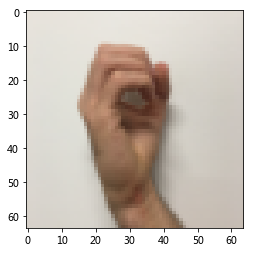

In [15]:
index = 20
plt.imshow(X_train_orig[index])

In [27]:
def one_hot(labels,C):
    C = tf.constant(C,name = 'C')
    
    result = tf.one_hot(indices=labels,depth=C,axis=0)
    sess = tf.Session()
    result = sess.run(result)
    result = result.reshape(6,-1)
    sess.close()
    return result

In [28]:
print(Y_train_orig.ravel)
one_hot(Y_train_orig,6).shape

<built-in method ravel of numpy.ndarray object at 0x00000000158D7E90>


(6, 1080)

In [29]:
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0],-1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0],-1).T

##数据扁平化处理
X_train = X_train_flatten/255
X_test= X_test_flatten/255

##转化为one-hot编码
Y_train = one_hot(Y_train_orig,6)
Y_test = one_hot(Y_test_orig,6)

print("训练集样本数 = " + str(X_train.shape[1]))
print("测试集样本数 = " + str(X_test.shape[1]))
print("X_train.shape: " + str(X_train.shape))
print("Y_train.shape: " + str(Y_train.shape))
print("X_test.shape: " + str(X_test.shape))
print("Y_test.shape: " + str(Y_test.shape))

训练集样本数 = 1080
测试集样本数 = 120
X_train.shape: (12288, 1080)
Y_train.shape: (6, 1080)
X_test.shape: (12288, 120)
Y_test.shape: (6, 120)
